# EDA

**DistanceFromHome** : with the bin = 3 , I can see clearly that the distance is not a good variable to describe the Attrition the most

**Age** : I can see that the Age is a huge effecter to the attrition Variable , the elder you go the less chances exist to churn

**Business Travel** : 3 values , Non-Travel: less chances to churn :8.0%
                                 Less-Travel : more chances to churn 16.96 %
                                 Travel-Frequently : the most chances to churn 24.9%

**DailyRate** : for dailyrate > 1357 there are no attrition cases

**Department** : Sales department is more chances to churn but not that much

**Education** : No effect

**Education Field** For "Medical" and "Life Science" Categories , there is a less chance to churn 
                    But for the 4 others is not so big , but more chance to churn


**9 -Environment Satisfaction**: huge effecter , 1>>>2>3>4

**10- Gender** : Males are little more chances to churn

**11 -Job Involvement** : huge effecter , 1>>2>3>4

**12 Job Level** : 1 >> (2<3>>4>5)

**13 - Job Role** : Not a great effector

**JobSatisfaction** : 1>2=3>4

**MaritalStatus** : Single is more chance to churn

**MonthlyIncome** : the first bins (1K) have more than 50% to churn 
                    then it become to decrease bin by bin except (9,10,12K)
                    for (14K - 18K) there is 1 case
                    for 19K there are 4 cases from 50 

**NumCompaniesWorked** : 18% of persons = 1 are churners
                        - 41% of all churners are =1 !!!

**OverTime** : 30% of persons = Yes are churners !!!!
                53% from all churners are overtime = Yes


**PercentSalaryHike** : the bigger the number the less people the less chances to churn

**PerformanceRating** : Not a good effector

**RelationshipSatisfaction** : Not huge effector (just little more chances when = 1)

**StockOptionLevel** : *0* : 24% are churners (and 64% of all churners are = 0 !!!!!!!)
                       *1* : 9% are churners
                       *2* : 7% 
                       *3* : 17%

**TotalWorkingYears** : *40*years the 2 are churners (100%)
                        *0 to 3* years (huge sample have churned)


**TrainingTimesLastYear** : *0* : 27% have curned
                            But it seems have no effect for other values cuz it's randomly distributed

**WorkLifeBalance** : *0* : 25% are churners

**YearsAtCompany** : for *0* - *1* there more than 34% chance to churn
                    the the more you go the less chances 

**YearsInCurrentRole** : Same but just for *0*
                        for more than *11* there are just 5 cases
                        for more than *15* years there is no case at all 

**YearsSinceLastPromotion** : Randomly distributed

**YearsWithCurrManager** : *0* : 32.3% are churners !!
                            *>10* there is just 3 cases


# Importations :

In [821]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split , learning_curve , GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier , LinearRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report , mean_absolute_error , mean_squared_error , r2_score , accuracy_score

# 1. Data Exploration :

In [822]:
# Load the dataset
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [823]:
data.shape

(1470, 35)

In [824]:
# Explore the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [825]:
# Check for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [826]:
# Check for duplicates
data.duplicated().sum()

0

In [827]:
# Descriptive statistics
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [828]:
# # Visualize distributions and relationships
# sns.pairplot(data, hue='Attrition')
# plt.show()

# 2. Data Cleaning

In [829]:
g = {
    'Yes': 1,
    'No': 0
}
data['Attrition'] = data['Attrition'].map(g)

In [830]:
constant_cols = ['EmployeeCount' , 'Over18' , 'StandardHours']
unique_cols = ['EmployeeNumber' , 'Gender']
cols_to_drop = ['Education' ,'YearsSinceLastPromotion','JobRole','PerformanceRating' ,'RelationshipSatisfaction']
data = data.drop(constant_cols , axis=1)
data = data.drop(unique_cols , axis=1)
data = data.drop(cols_to_drop , axis=1)
 
# data = data.drop(cols_to_drop , axis=1)



# 3. Data Visualizations 

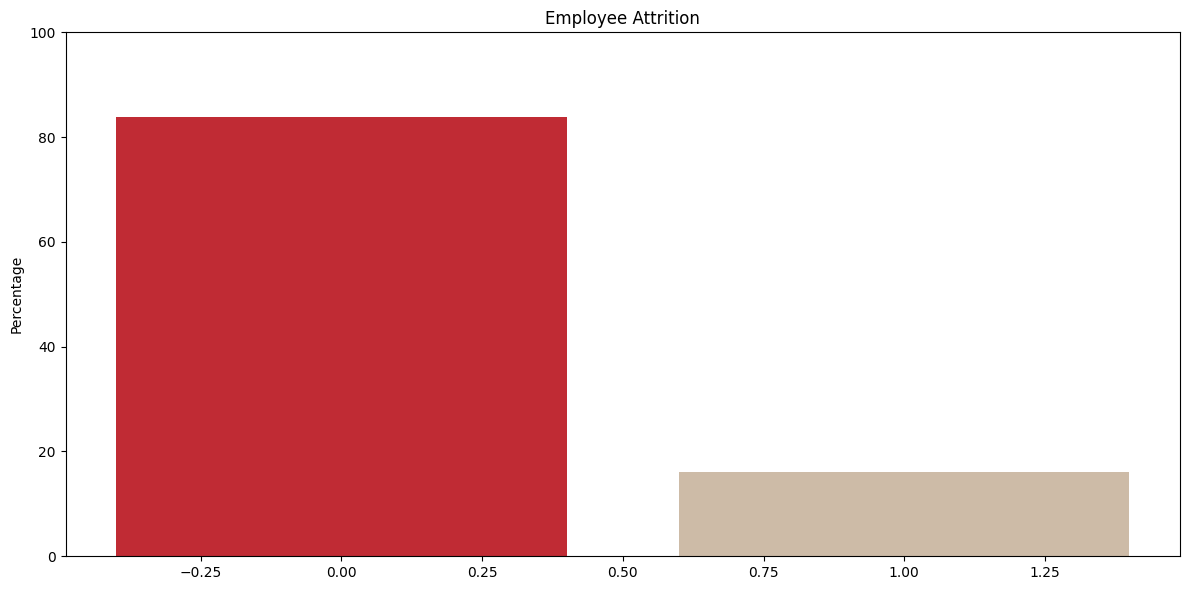

In [831]:
# Calculate percentages
attrition_percentages = data['Attrition'].value_counts(normalize=True) * 100
department_attrition_percentages = data[data['Attrition'] == 'Yes']['Department'].value_counts(normalize=True) * 100

# Plot
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Bar chart
axs.bar(attrition_percentages.index, attrition_percentages.values, color=['#C02B34', '#CDBBA7'])
axs.set_title('Employee Attrition')
axs.set_ylabel('Percentage')
axs.set_ylim(0, 100)

plt.tight_layout()
plt.show()





In [832]:
age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

In [833]:
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

In [834]:
dept_att=data.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

In [835]:
dept_att=data.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='JobSatisfaction',y='Counts',color='Attrition',title='JobSatisfaction wise Counts of People in an Organization')
fig.show()

In [836]:
dept_att=data.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='StockOptionLevel',y='Counts',color='Attrition',title='StockOptionLevel wise Counts of People in an Organization')
fig.show()

In [837]:
wlb_att=data.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb_att,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organization')

C:\Users\Home\AppData\Local\Temp\ipykernel_13396\786143953.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Home\AppData\Local\Temp\ipykernel_13396\786143953.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Home\AppData\Local\Temp\ipykernel_13396\786143953.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Home\AppData\Local\Temp\ipykernel_13396\786143953.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Home\AppData\Local\Temp\ipykernel_13396\786143953.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




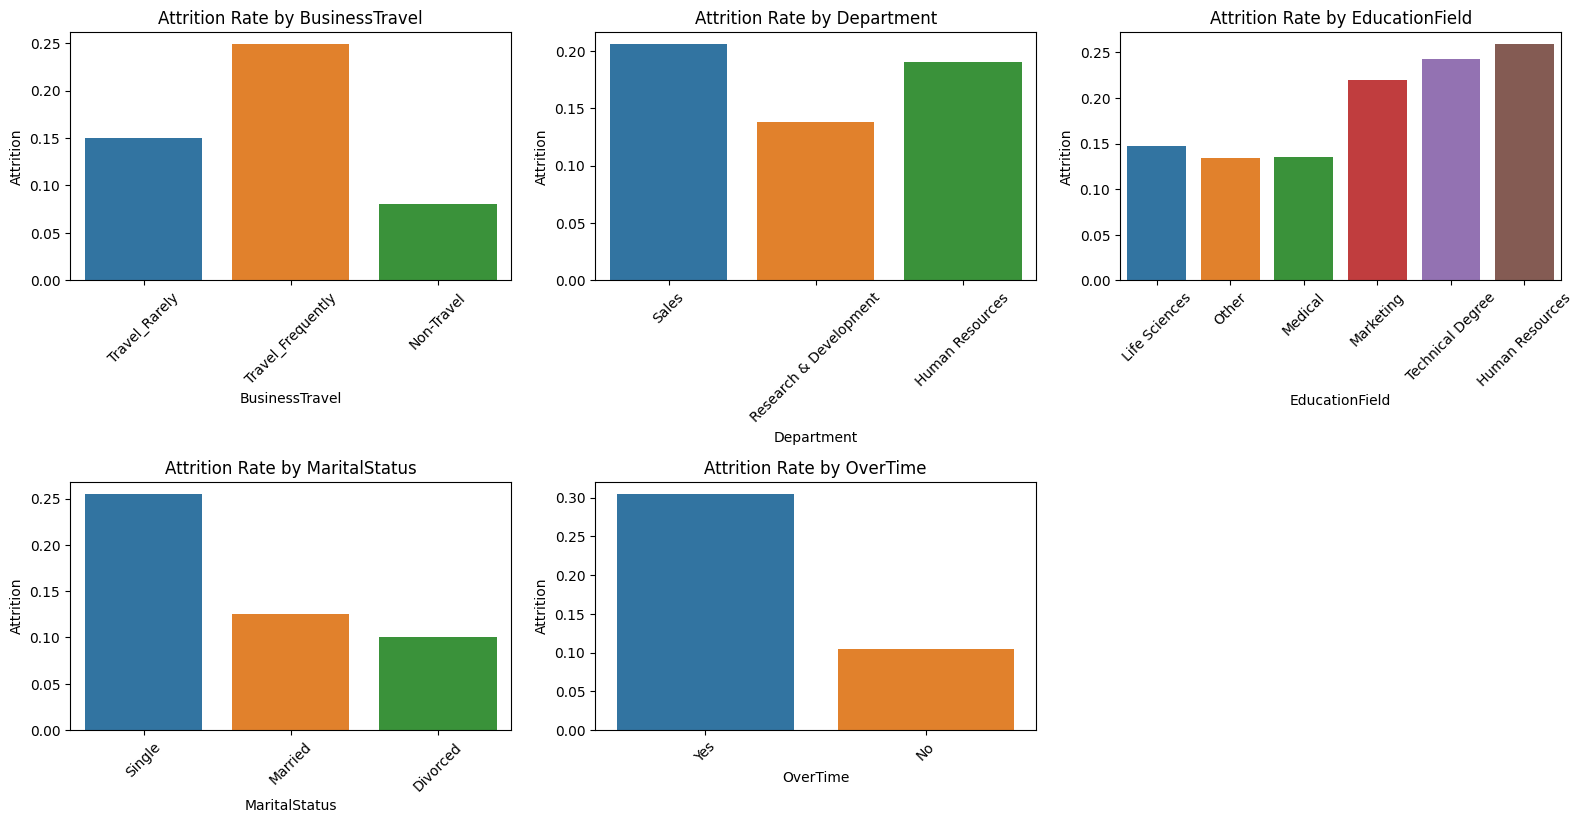

In [838]:
# Visualize barplot for categorical variables
categorical_vars = data.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=var, y='Attrition', data=data, ci=None)
    plt.title(f'Attrition Rate by {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


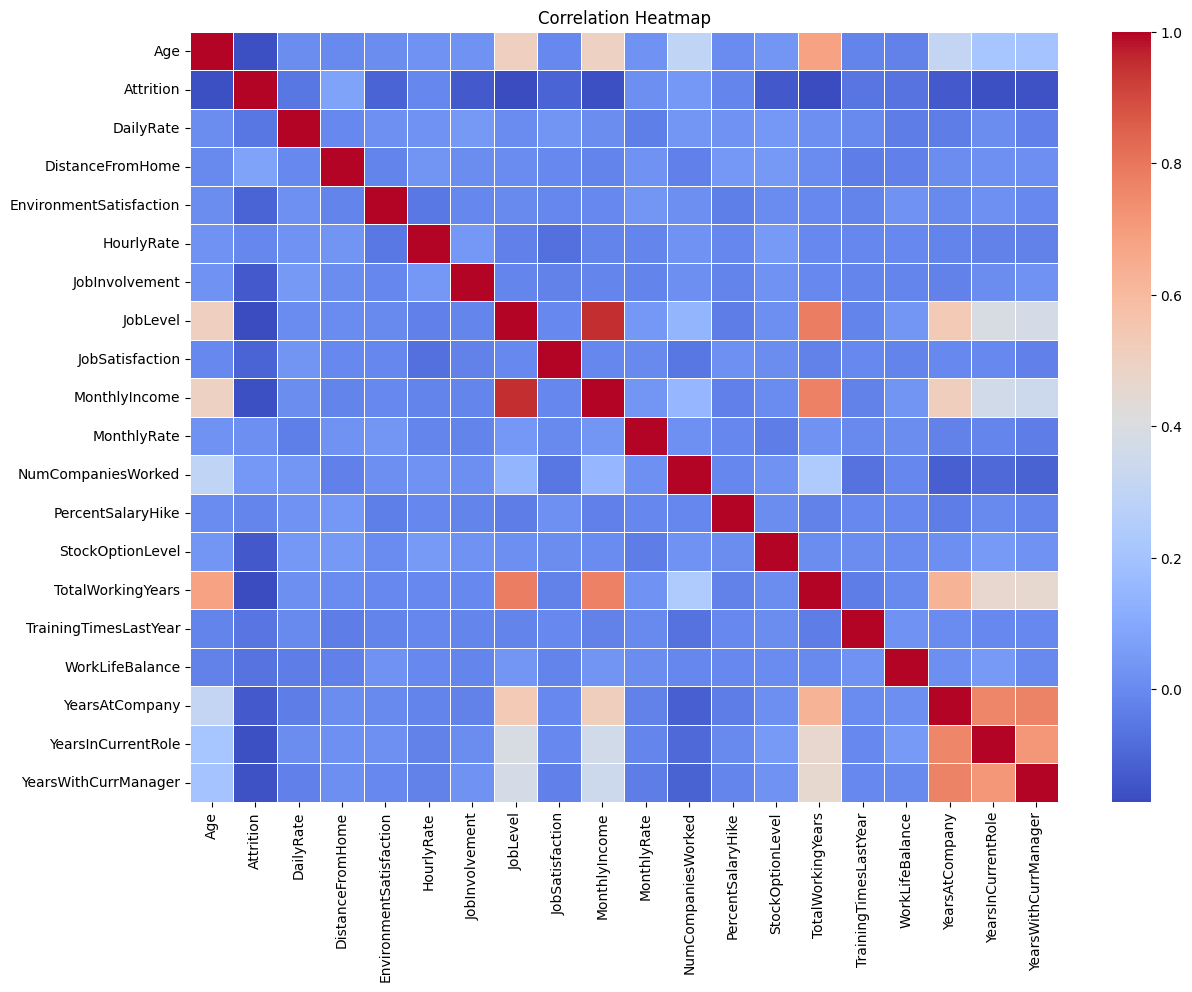

In [839]:
# Visualize correlation heatmap
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Statistics

In [840]:
numeric_cols = ['Age', 'DailyRate',
       'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 
       'YearsWithCurrManager']# 'Education','PerformanceRating','RelationshipSatisfaction','YearsSinceLastPromotion'
len(numeric_cols)

19

In [841]:
def t_test(data,col):
    alpha = 0.09
    stat , p_value = ttest_ind(data[col], data[col])
    if p_value < alpha:
        return "H0 Rejeté"
    else :
        return 0

In [842]:
for col in numeric_cols:
    print(f'{col :-<50} {t_test(data,col)}')

Age----------------------------------------------- 0
DailyRate----------------------------------------- 0
DistanceFromHome---------------------------------- 0
EnvironmentSatisfaction--------------------------- 0
HourlyRate---------------------------------------- 0
JobInvolvement------------------------------------ 0
JobLevel------------------------------------------ 0
JobSatisfaction----------------------------------- 0
MonthlyIncome------------------------------------- 0
MonthlyRate--------------------------------------- 0
NumCompaniesWorked-------------------------------- 0
PercentSalaryHike--------------------------------- 0
StockOptionLevel---------------------------------- 0
TotalWorkingYears--------------------------------- 0
TrainingTimesLastYear----------------------------- 0
WorkLifeBalance----------------------------------- 0
YearsAtCompany------------------------------------ 0
YearsInCurrentRole-------------------------------- 0
YearsWithCurrManager--------------------------

In [843]:
def chi2(col):
    alpha = 0.02
    contingency_table = pd.crosstab(data[col], data['Attrition'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < alpha:
        return 'H0 rejeté' # print(f'{p} < {alpha :-<50} H0 Rejeté')
    else : 
        return 0

In [844]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {chi2(col)}')

BusinessTravel------------------------------------ H0 rejeté
Department---------------------------------------- H0 rejeté
EducationField------------------------------------ H0 rejeté
MaritalStatus------------------------------------- H0 rejeté
OverTime------------------------------------------ H0 rejeté


# Data Modeling 

In [845]:
X=data[numeric_cols]
y=data[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.841
Test Model accruracy scores: 0.845
--------------------------------------------------------------------------


In [846]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_vars =['Age', 'DailyRate', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])


# 3. Handling Categorical Variables(Encoding):

In [847]:
# One-hot encoding for categorical variables
categorical_vars = ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', 'OverTime']# 'JobRole',
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)




In [848]:
data.shape

(1470, 25)

# 4. Fature Engineering 

In [849]:

X=data_encoded.drop(columns=['Attrition'] , axis=1)
y=data_encoded[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [850]:
def evaluation(model ,X_train = X_train , X_test = X_test):

    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test , y_pred))
    print(classification_report(y_test , y_pred))

    N , train_score , val_score = learning_curve(model , X_train , y_train ,
                                                 cv=5 , scoring='f1',
                                                 train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [851]:
randomforest = RandomForestClassifier(n_estimators=100)
log_reg=LogisticRegression(C=1000,max_iter=10000)
gaussian = GaussianNB()
# dec_tree = DecisionTreeClassifier(n_estimators=100)
xgboost = XGBClassifier()


[[304   6]
 [ 35  23]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.79      0.40      0.53        58

    accuracy                           0.89       368
   macro avg       0.84      0.69      0.73       368
weighted avg       0.88      0.89      0.87       368



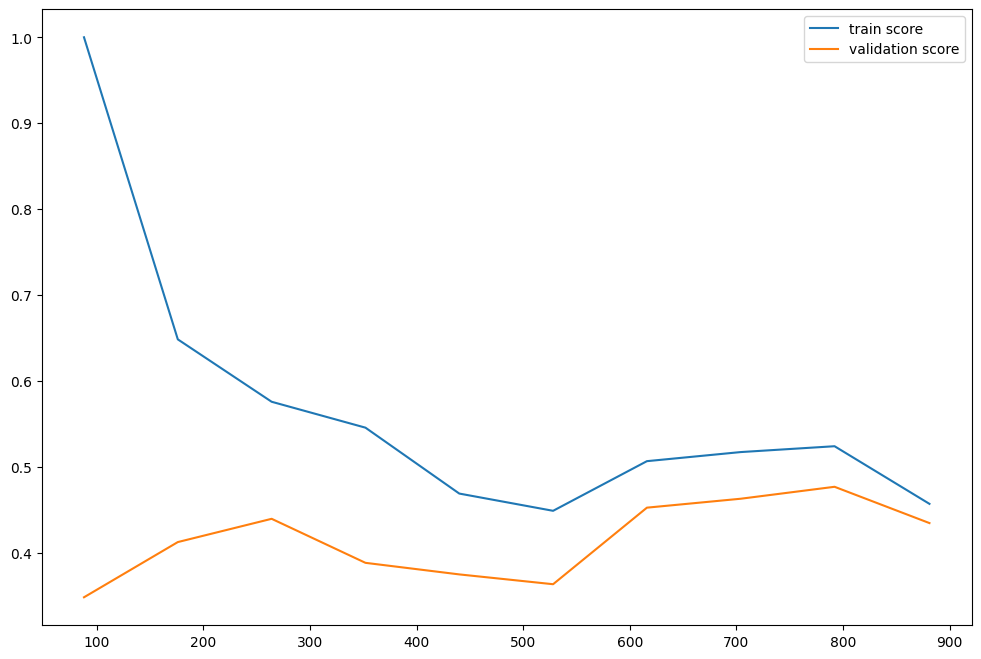

In [852]:
evaluation(log_reg)

[[302   8]
 [ 39  19]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       310
           1       0.70      0.33      0.45        58

    accuracy                           0.87       368
   macro avg       0.79      0.65      0.69       368
weighted avg       0.86      0.87      0.85       368



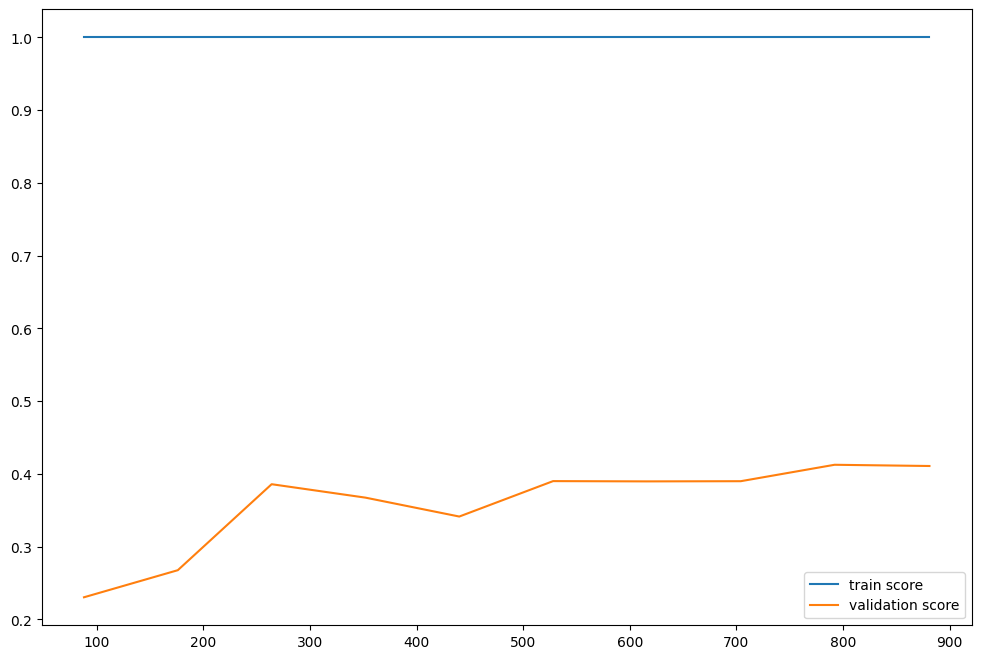

In [853]:
evaluation(xgboost)

In [854]:
logreg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)


c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Home\AppData\Local\Programs\Python\P

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.430379746835443


c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

